# Train a JointVAE model

### Get MNIST data
Build a simple JointVAE model on MNIST

### Define latent distribution of the model

In [1]:
from utils.dataloaders import get_mnist_dataloaders, get_celeba_dataloader 
from torchvision import transforms 
from torchvision.datasets import ImageFolder 
from torch.utils.data import DataLoader 
import os 
import torch
from jointvae.models import VAE
from jointvae.training import Trainer
from torch import optim
from viz.visualize_c import Visualizer
import matplotlib.pyplot as plt
import numpy as np



valid_loader, train_loader, test_loader = get_mnist_dataloaders(batch_size=64)

# Latent distribution will be joint distribution of 10 gaussian normal distributions  7-14
# and one 10 dimensional Gumbel Softmax distribution
n_cont = 32
disc = [10]
n_disc = len(disc)
latent_spec = {'cont': n_cont,
               'disc': disc}

device = torch.device('cuda')
#model = VAE(latent_spec=latent_spec, img_size=(3, 64, 64)).cuda()
model = VAE(latent_spec=latent_spec, img_size=(1, 32, 32)).cuda()
print(model)


lr=1e-4
# Build optimizer
optimizer = optim.Adam(model.parameters(), lr=lr)
# Define the capacities
# Continuous channels
gamma=1.0
cont_capacity = [0.0, 0.0, 25000, gamma]  # Starting at a capacity of 0.0, increase this to 5.0
                                         # over 25000 iterations with a gamma of 30.0
# Discrete channels
disc_capacity = [0.0, 0.0, 25000, gamma]  # Starting at a capacity of 0.0, increase this to 5.0
                                         # over 25000 iterations with a gamma of 30.0


lambda_d = 2
lambda_od = 10*lambda_d
lambda_dis = 30*lambda_d 
path="figures/face/cont_{}/Beta_ {}lambda{}".format(n_cont,gamma,lambda_d)
# Build a trainer
trainer = Trainer(model, optimizer,
                  cont_capacity=cont_capacity,
                  disc_capacity=disc_capacity,lambda_d = lambda_d,
                  lambda_od = lambda_od, lambda_dis = lambda_dis )
# Build a visualizer which will be passed to trainer to visualize progress during training
viz = Visualizer(model)

L0Pair(256 -> 2*32, droprate_init=0.2, lamba=0.1, temperature=0.05, weight_decay=0.001, local_rep=False)
VAE(
  (img_to_features): Sequential(
    (0): Conv2d(1, 32, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(32, 64, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1))
    (3): ReLU()
    (4): Conv2d(64, 64, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1))
    (5): ReLU()
  )
  (features_to_hidden): Sequential(
    (0): Linear(in_features=1024, out_features=256, bias=True)
    (1): ReLU()
  )
  (fc_latent): Sequential(
    (0): L0Pair(256 -> 2*32, droprate_init=0.2, lamba=0.1, temperature=0.05, weight_decay=0.001, local_rep=False)
  )
  (fc_alphas): ModuleList(
    (0): Linear(in_features=256, out_features=10, bias=True)
  )
  (latent_to_features): Sequential(
    (0): Linear(in_features=42, out_features=256, bias=True)
    (1): ReLU()
    (2): Linear(in_features=256, out_features=1024, bias=True)
    (3): ReLU()
  )
  (features_to_img): Sequenti

### Build a model

### Train the model

from jointvae.training import Trainer


trainer._train_epoch(train_loader,valid_loader)

In [2]:
# Train model for 10 epochs
# Note this should really be a 100 epochs and trained on a GPU, but this is just to demo
###1e-5 6859 1e-4 6727 5e-4 6722 try tanh/L1 loss/beta--->DIP
import time

start = time.time()
trainer.train(train_loader,valid_loader, epochs=100, save_training_gif=('./training.gif', viz))
end = time.time()
print(end - start)
torch.save(model.state_dict(), 'model2_params.pkl')
torch.save(model, './model2')
##15.078 -   17.209= 0.0147 - 0.0168 error tanh 
##PLOT THE CURVE!!!!!

/data/anaconda/envs/mli/lib/python3.6/site-packages/torch/nn/functional.py:1332: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")


0/54000	Loss: 385.512	L0 Loss: 0.424
3200/54000	Loss: 351.084	L0 Loss: 0.424
6400/54000	Loss: 250.725	L0 Loss: 0.424
9600/54000	Loss: 186.329	L0 Loss: 0.424
12800/54000	Loss: 161.105	L0 Loss: 0.424
16000/54000	Loss: 154.890	L0 Loss: 0.424
19200/54000	Loss: 154.812	L0 Loss: 0.424
22400/54000	Loss: 153.323	L0 Loss: 0.424
25600/54000	Loss: 149.572	L0 Loss: 0.424
28800/54000	Loss: 148.760	L0 Loss: 0.424
32000/54000	Loss: 148.361	L0 Loss: 0.424
35200/54000	Loss: 143.534	L0 Loss: 0.424
38400/54000	Loss: 142.047	L0 Loss: 0.424
41600/54000	Loss: 140.093	L0 Loss: 0.424
44800/54000	Loss: 139.638	L0 Loss: 0.424
48000/54000	Loss: 140.166	L0 Loss: 0.424
51200/54000	Loss: 138.266	L0 Loss: 0.424
Valid Loss: 136.469, Recon Error: 0.053
136.46941107891976
Epoch: 1 Average loss: 167.60 Valid loss: 136.46941107891976	Recon Error:0.053
0/54000	Loss: 135.622	L0 Loss: 0.424
3200/54000	Loss: 137.630	L0 Loss: 0.424
6400/54000	Loss: 136.931	L0 Loss: 0.424
9600/54000	Loss: 135.601	L0 Loss: 0.424
12800/54000	Los

0/54000	Loss: 101.771	L0 Loss: 0.429
3200/54000	Loss: 104.321	L0 Loss: 0.429
6400/54000	Loss: 103.520	L0 Loss: 0.429
9600/54000	Loss: 103.809	L0 Loss: 0.429
12800/54000	Loss: 101.143	L0 Loss: 0.429
16000/54000	Loss: 103.169	L0 Loss: 0.429
19200/54000	Loss: 103.921	L0 Loss: 0.429
22400/54000	Loss: 101.932	L0 Loss: 0.429
25600/54000	Loss: 101.064	L0 Loss: 0.429
28800/54000	Loss: 103.237	L0 Loss: 0.429
32000/54000	Loss: 102.363	L0 Loss: 0.429
35200/54000	Loss: 103.323	L0 Loss: 0.429
38400/54000	Loss: 102.431	L0 Loss: 0.429
41600/54000	Loss: 100.725	L0 Loss: 0.430
44800/54000	Loss: 103.087	L0 Loss: 0.430
48000/54000	Loss: 103.093	L0 Loss: 0.430
51200/54000	Loss: 101.923	L0 Loss: 0.430
Valid Loss: 100.934, Recon Error: 0.025
100.93370672997008
Epoch: 11 Average loss: 102.61 Valid loss: 100.93370672997008	Recon Error:0.025
0/54000	Loss: 89.740	L0 Loss: 0.430
3200/54000	Loss: 102.709	L0 Loss: 0.430
6400/54000	Loss: 102.314	L0 Loss: 0.430
9600/54000	Loss: 100.147	L0 Loss: 0.430
12800/54000	Los

6400/54000	Loss: 98.759	L0 Loss: 0.435
9600/54000	Loss: 97.015	L0 Loss: 0.435
12800/54000	Loss: 98.891	L0 Loss: 0.435
16000/54000	Loss: 98.147	L0 Loss: 0.436
19200/54000	Loss: 97.904	L0 Loss: 0.436
22400/54000	Loss: 95.597	L0 Loss: 0.436
25600/54000	Loss: 98.181	L0 Loss: 0.436
28800/54000	Loss: 98.591	L0 Loss: 0.436
32000/54000	Loss: 98.656	L0 Loss: 0.436
35200/54000	Loss: 96.283	L0 Loss: 0.436
38400/54000	Loss: 97.129	L0 Loss: 0.436
41600/54000	Loss: 98.074	L0 Loss: 0.436
44800/54000	Loss: 98.834	L0 Loss: 0.436
48000/54000	Loss: 98.597	L0 Loss: 0.436
51200/54000	Loss: 97.336	L0 Loss: 0.436
Valid Loss: 96.659, Recon Error: 0.018
96.65943186333838
Epoch: 21 Average loss: 97.75 Valid loss: 96.65943186333838	Recon Error:0.018
0/54000	Loss: 90.122	L0 Loss: 0.436
3200/54000	Loss: 96.377	L0 Loss: 0.436
6400/54000	Loss: 96.322	L0 Loss: 0.436
9600/54000	Loss: 97.313	L0 Loss: 0.436
12800/54000	Loss: 98.062	L0 Loss: 0.436
16000/54000	Loss: 94.657	L0 Loss: 0.436
19200/54000	Loss: 97.021	L0 Loss: 

16000/54000	Loss: 97.351	L0 Loss: 0.441
19200/54000	Loss: 92.990	L0 Loss: 0.441
22400/54000	Loss: 94.252	L0 Loss: 0.441
25600/54000	Loss: 94.337	L0 Loss: 0.441
28800/54000	Loss: 95.550	L0 Loss: 0.441
32000/54000	Loss: 94.977	L0 Loss: 0.441
35200/54000	Loss: 93.360	L0 Loss: 0.441
38400/54000	Loss: 94.149	L0 Loss: 0.441
41600/54000	Loss: 94.342	L0 Loss: 0.441
44800/54000	Loss: 96.201	L0 Loss: 0.441
48000/54000	Loss: 94.701	L0 Loss: 0.441
51200/54000	Loss: 93.154	L0 Loss: 0.441
Valid Loss: 92.908, Recon Error: 0.016
92.90774820206013
Epoch: 31 Average loss: 94.54 Valid loss: 92.90774820206013	Recon Error:0.016
0/54000	Loss: 91.425	L0 Loss: 0.441
3200/54000	Loss: 95.423	L0 Loss: 0.441
6400/54000	Loss: 94.472	L0 Loss: 0.441
9600/54000	Loss: 95.081	L0 Loss: 0.442
12800/54000	Loss: 95.522	L0 Loss: 0.442
16000/54000	Loss: 95.370	L0 Loss: 0.442
19200/54000	Loss: 95.560	L0 Loss: 0.442
22400/54000	Loss: 95.009	L0 Loss: 0.442
25600/54000	Loss: 93.712	L0 Loss: 0.442
28800/54000	Loss: 92.312	L0 Loss

25600/54000	Loss: 91.301	L0 Loss: 0.445
28800/54000	Loss: 93.206	L0 Loss: 0.445
32000/54000	Loss: 92.844	L0 Loss: 0.445
35200/54000	Loss: 93.676	L0 Loss: 0.445
38400/54000	Loss: 92.578	L0 Loss: 0.445
41600/54000	Loss: 94.692	L0 Loss: 0.445
44800/54000	Loss: 93.397	L0 Loss: 0.445
48000/54000	Loss: 92.752	L0 Loss: 0.445
51200/54000	Loss: 94.187	L0 Loss: 0.445
Valid Loss: 91.023, Recon Error: 0.017
91.02328531792823
Epoch: 41 Average loss: 92.91 Valid loss: 91.02328531792823	Recon Error:0.017
0/54000	Loss: 81.001	L0 Loss: 0.445
3200/54000	Loss: 93.912	L0 Loss: 0.445
6400/54000	Loss: 92.206	L0 Loss: 0.445
9600/54000	Loss: 92.946	L0 Loss: 0.445
12800/54000	Loss: 93.198	L0 Loss: 0.445
16000/54000	Loss: 91.261	L0 Loss: 0.445
19200/54000	Loss: 91.450	L0 Loss: 0.445
22400/54000	Loss: 92.366	L0 Loss: 0.445
25600/54000	Loss: 91.908	L0 Loss: 0.446
28800/54000	Loss: 93.722	L0 Loss: 0.446
32000/54000	Loss: 93.390	L0 Loss: 0.446
35200/54000	Loss: 92.830	L0 Loss: 0.446
38400/54000	Loss: 91.347	L0 Loss

35200/54000	Loss: 90.570	L0 Loss: 0.447
38400/54000	Loss: 91.349	L0 Loss: 0.447
41600/54000	Loss: 91.193	L0 Loss: 0.447
44800/54000	Loss: 92.095	L0 Loss: 0.447
48000/54000	Loss: 90.683	L0 Loss: 0.447
51200/54000	Loss: 91.649	L0 Loss: 0.447
Valid Loss: 89.616, Recon Error: 0.017
89.61579911252285
Epoch: 51 Average loss: 91.69 Valid loss: 89.61579911252285	Recon Error:0.017
0/54000	Loss: 87.825	L0 Loss: 0.447
3200/54000	Loss: 91.233	L0 Loss: 0.447
6400/54000	Loss: 92.198	L0 Loss: 0.447
9600/54000	Loss: 90.630	L0 Loss: 0.447
12800/54000	Loss: 90.364	L0 Loss: 0.447
16000/54000	Loss: 89.826	L0 Loss: 0.447
19200/54000	Loss: 91.199	L0 Loss: 0.447
22400/54000	Loss: 91.695	L0 Loss: 0.447
25600/54000	Loss: 90.232	L0 Loss: 0.447
28800/54000	Loss: 92.031	L0 Loss: 0.447
32000/54000	Loss: 90.840	L0 Loss: 0.447
35200/54000	Loss: 90.887	L0 Loss: 0.447
38400/54000	Loss: 92.411	L0 Loss: 0.447
41600/54000	Loss: 89.738	L0 Loss: 0.446
44800/54000	Loss: 90.949	L0 Loss: 0.446
48000/54000	Loss: 90.421	L0 Loss

44800/54000	Loss: 90.252	L0 Loss: 0.444
48000/54000	Loss: 90.047	L0 Loss: 0.444
51200/54000	Loss: 89.427	L0 Loss: 0.444
Valid Loss: 89.596, Recon Error: 0.019
89.59567715259308
Epoch: 61 Average loss: 90.16 Valid loss: 89.59567715259308	Recon Error:0.019
0/54000	Loss: 84.709	L0 Loss: 0.444
3200/54000	Loss: 89.651	L0 Loss: 0.444
6400/54000	Loss: 89.644	L0 Loss: 0.444
9600/54000	Loss: 90.685	L0 Loss: 0.444
12800/54000	Loss: 88.964	L0 Loss: 0.444
16000/54000	Loss: 91.472	L0 Loss: 0.444
19200/54000	Loss: 89.330	L0 Loss: 0.444
22400/54000	Loss: 89.700	L0 Loss: 0.444
25600/54000	Loss: 89.170	L0 Loss: 0.444
28800/54000	Loss: 90.855	L0 Loss: 0.444
32000/54000	Loss: 89.460	L0 Loss: 0.444
35200/54000	Loss: 88.932	L0 Loss: 0.443
38400/54000	Loss: 90.697	L0 Loss: 0.443
41600/54000	Loss: 90.543	L0 Loss: 0.443
44800/54000	Loss: 89.062	L0 Loss: 0.443
48000/54000	Loss: 89.160	L0 Loss: 0.443
51200/54000	Loss: 88.765	L0 Loss: 0.443
Valid Loss: 89.171, Recon Error: 0.018
89.1713035258841
Epoch: 62 Averag

Valid Loss: 87.414, Recon Error: 0.016
87.41381470700527
Epoch: 71 Average loss: 89.00 Valid loss: 87.41381470700527	Recon Error:0.016
0/54000	Loss: 78.341	L0 Loss: 0.438
3200/54000	Loss: 88.633	L0 Loss: 0.438
6400/54000	Loss: 88.798	L0 Loss: 0.438
9600/54000	Loss: 87.592	L0 Loss: 0.438
12800/54000	Loss: 88.340	L0 Loss: 0.438
16000/54000	Loss: 89.194	L0 Loss: 0.438
19200/54000	Loss: 89.316	L0 Loss: 0.438
22400/54000	Loss: 89.181	L0 Loss: 0.438
25600/54000	Loss: 88.701	L0 Loss: 0.438
28800/54000	Loss: 88.450	L0 Loss: 0.438
32000/54000	Loss: 90.408	L0 Loss: 0.438
35200/54000	Loss: 87.999	L0 Loss: 0.438
38400/54000	Loss: 89.151	L0 Loss: 0.438
41600/54000	Loss: 87.387	L0 Loss: 0.437
44800/54000	Loss: 87.459	L0 Loss: 0.437
48000/54000	Loss: 87.800	L0 Loss: 0.437
51200/54000	Loss: 88.363	L0 Loss: 0.437
Valid Loss: 86.856, Recon Error: 0.015
86.85592204966444
Epoch: 72 Average loss: 88.58 Valid loss: 86.85592204966444	Recon Error:0.015
0/54000	Loss: 89.674	L0 Loss: 0.437
3200/54000	Loss: 88.2

0/54000	Loss: 86.280	L0 Loss: 0.428
3200/54000	Loss: 87.614	L0 Loss: 0.428
6400/54000	Loss: 86.929	L0 Loss: 0.428
9600/54000	Loss: 87.653	L0 Loss: 0.428
12800/54000	Loss: 87.464	L0 Loss: 0.428
16000/54000	Loss: 85.806	L0 Loss: 0.428
19200/54000	Loss: 86.864	L0 Loss: 0.428
22400/54000	Loss: 86.400	L0 Loss: 0.428
25600/54000	Loss: 87.081	L0 Loss: 0.428
28800/54000	Loss: 86.734	L0 Loss: 0.428
32000/54000	Loss: 87.742	L0 Loss: 0.428
35200/54000	Loss: 87.306	L0 Loss: 0.428
38400/54000	Loss: 87.211	L0 Loss: 0.428
41600/54000	Loss: 87.719	L0 Loss: 0.427
44800/54000	Loss: 88.522	L0 Loss: 0.427
48000/54000	Loss: 86.312	L0 Loss: 0.427
51200/54000	Loss: 86.237	L0 Loss: 0.427
Valid Loss: 86.014, Recon Error: 0.015
86.01423994023749
Epoch: 82 Average loss: 87.15 Valid loss: 86.01423994023749	Recon Error:0.015
0/54000	Loss: 82.170	L0 Loss: 0.427
3200/54000	Loss: 89.857	L0 Loss: 0.427
6400/54000	Loss: 87.749	L0 Loss: 0.427
9600/54000	Loss: 86.856	L0 Loss: 0.427
12800/54000	Loss: 86.507	L0 Loss: 0.427

12800/54000	Loss: 85.832	L0 Loss: 0.414
16000/54000	Loss: 85.270	L0 Loss: 0.414
19200/54000	Loss: 86.497	L0 Loss: 0.414
22400/54000	Loss: 85.621	L0 Loss: 0.414
25600/54000	Loss: 86.240	L0 Loss: 0.414
28800/54000	Loss: 86.996	L0 Loss: 0.414
32000/54000	Loss: 87.007	L0 Loss: 0.414
35200/54000	Loss: 85.622	L0 Loss: 0.414
38400/54000	Loss: 85.280	L0 Loss: 0.414
41600/54000	Loss: 86.489	L0 Loss: 0.414
44800/54000	Loss: 86.605	L0 Loss: 0.413
48000/54000	Loss: 86.722	L0 Loss: 0.413
51200/54000	Loss: 85.529	L0 Loss: 0.413
Valid Loss: 85.456, Recon Error: 0.016
85.45597928635617
Epoch: 92 Average loss: 86.33 Valid loss: 85.45597928635617	Recon Error:0.016
0/54000	Loss: 88.615	L0 Loss: 0.413
3200/54000	Loss: 85.619	L0 Loss: 0.413
6400/54000	Loss: 86.730	L0 Loss: 0.413
9600/54000	Loss: 87.215	L0 Loss: 0.413
12800/54000	Loss: 86.671	L0 Loss: 0.413
16000/54000	Loss: 85.519	L0 Loss: 0.413
19200/54000	Loss: 86.365	L0 Loss: 0.413
22400/54000	Loss: 86.467	L0 Loss: 0.413
25600/54000	Loss: 87.173	L0 Loss

In [34]:
model = VAE(latent_spec=latent_spec, img_size=(1, 32, 32)).cuda()
model.load_state_dict(torch.load('model2_params.pkl'))
path="figures/face/cont_{}/pruned_Beta_ {}lamba{}_ONLYPAIR".format(n_cont,gamma,0.1)
loss = trainer.get_losses()
#loss    recon_loss    kl_loss    DIP_loss
print(loss)
losses = ["loss", "recon_loss", "kl_loss", "DIP_loss"]
for loss in losses:
    print(loss)
DIP_loss = np.array(loss["DIP_loss"])[0::180]
loss = np.array(loss["loss"])[0::180]
kl_loss = np.array(loss["kl_loss"])[0::180]
recon_loss = np.array(loss["recon_loss"])[0::180]
x = np.arange(DIP_loss.shape[0])
plt.plot(x, DIP_loss)

L0Pair(256 -> 2*32, droprate_init=0.2, lamba=0.1, temperature=0.05, weight_decay=0.001, local_rep=False)


IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



TypeError: string indices must be integers

# torch.cuda.is_available()
# device = torch.device('cuda')
# print(device)
torch.cuda.current_device()
torch.cuda.get_device_name(device)

###Chi-square test
import torch
tensor_one = torch.tensor([[1,2,3],[4,5,6]])
tensor_two = torch.tensor([[6,8,9],[10,11,12]])
tensor_list = [tensor_one, tensor_two]
tens_list = []
for tensor in tensor_list:
    
    print(tensor)
    length = tensor.shape[1]
    tens_list.append(torch.mean(tensor.float(),dim=0))
    
tens_list = torch.stack(tens_list).reshape(1,-1)
tens_listT = tens_list.t()
matrix = tens_listT.matmul(tens_list)
print(matrix)
print("--------")
Chi2 =0
for i in range(len(tensor_list)):
    for j in range(len(tensor_list)):
        if i > j:
            submatrix = matrix[j*length:(j+1)*length,i*length:(i+1)*length]
            c_sum = torch.sum(submatrix,dim=0).reshape(-1,1)
            
            r_sum = torch.sum(submatrix,dim=1).reshape(1,-1)
            all_sum = torch.sum(submatrix)
            Expectation = c_sum.matmul(r_sum)/all_sum
            print(all_sum,c_sum,r_sum,Expectation)
            Chi2 += torch.sum((submatrix-Expectation)**2/Expectation)
            
        
print(Chi2)



### Visualize

unsaved tensor([[1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
         1.0000, 1.0000, 0.0000, 1.0000, 0.1232, 1.0000, 1.0000, 1.0000, 1.0000,
         1.0000, 0.0000, 1.0000, 1.0000, 0.0000, 1.0000, 1.0000, 0.0000, 1.0000,
         1.0000, 1.0000, 0.0000, 0.0000, 1.0000]], device='cuda:0',
       grad_fn=<ViewBackward>)
(8, 8)
1.0


/data/home/ISO/Pruned_VAE/viz/visualize_c.py:41: UserWarning: volatile was removed and now has no effect. Use `with torch.no_grad():` instead.
  input_data = Variable(data, volatile=True)


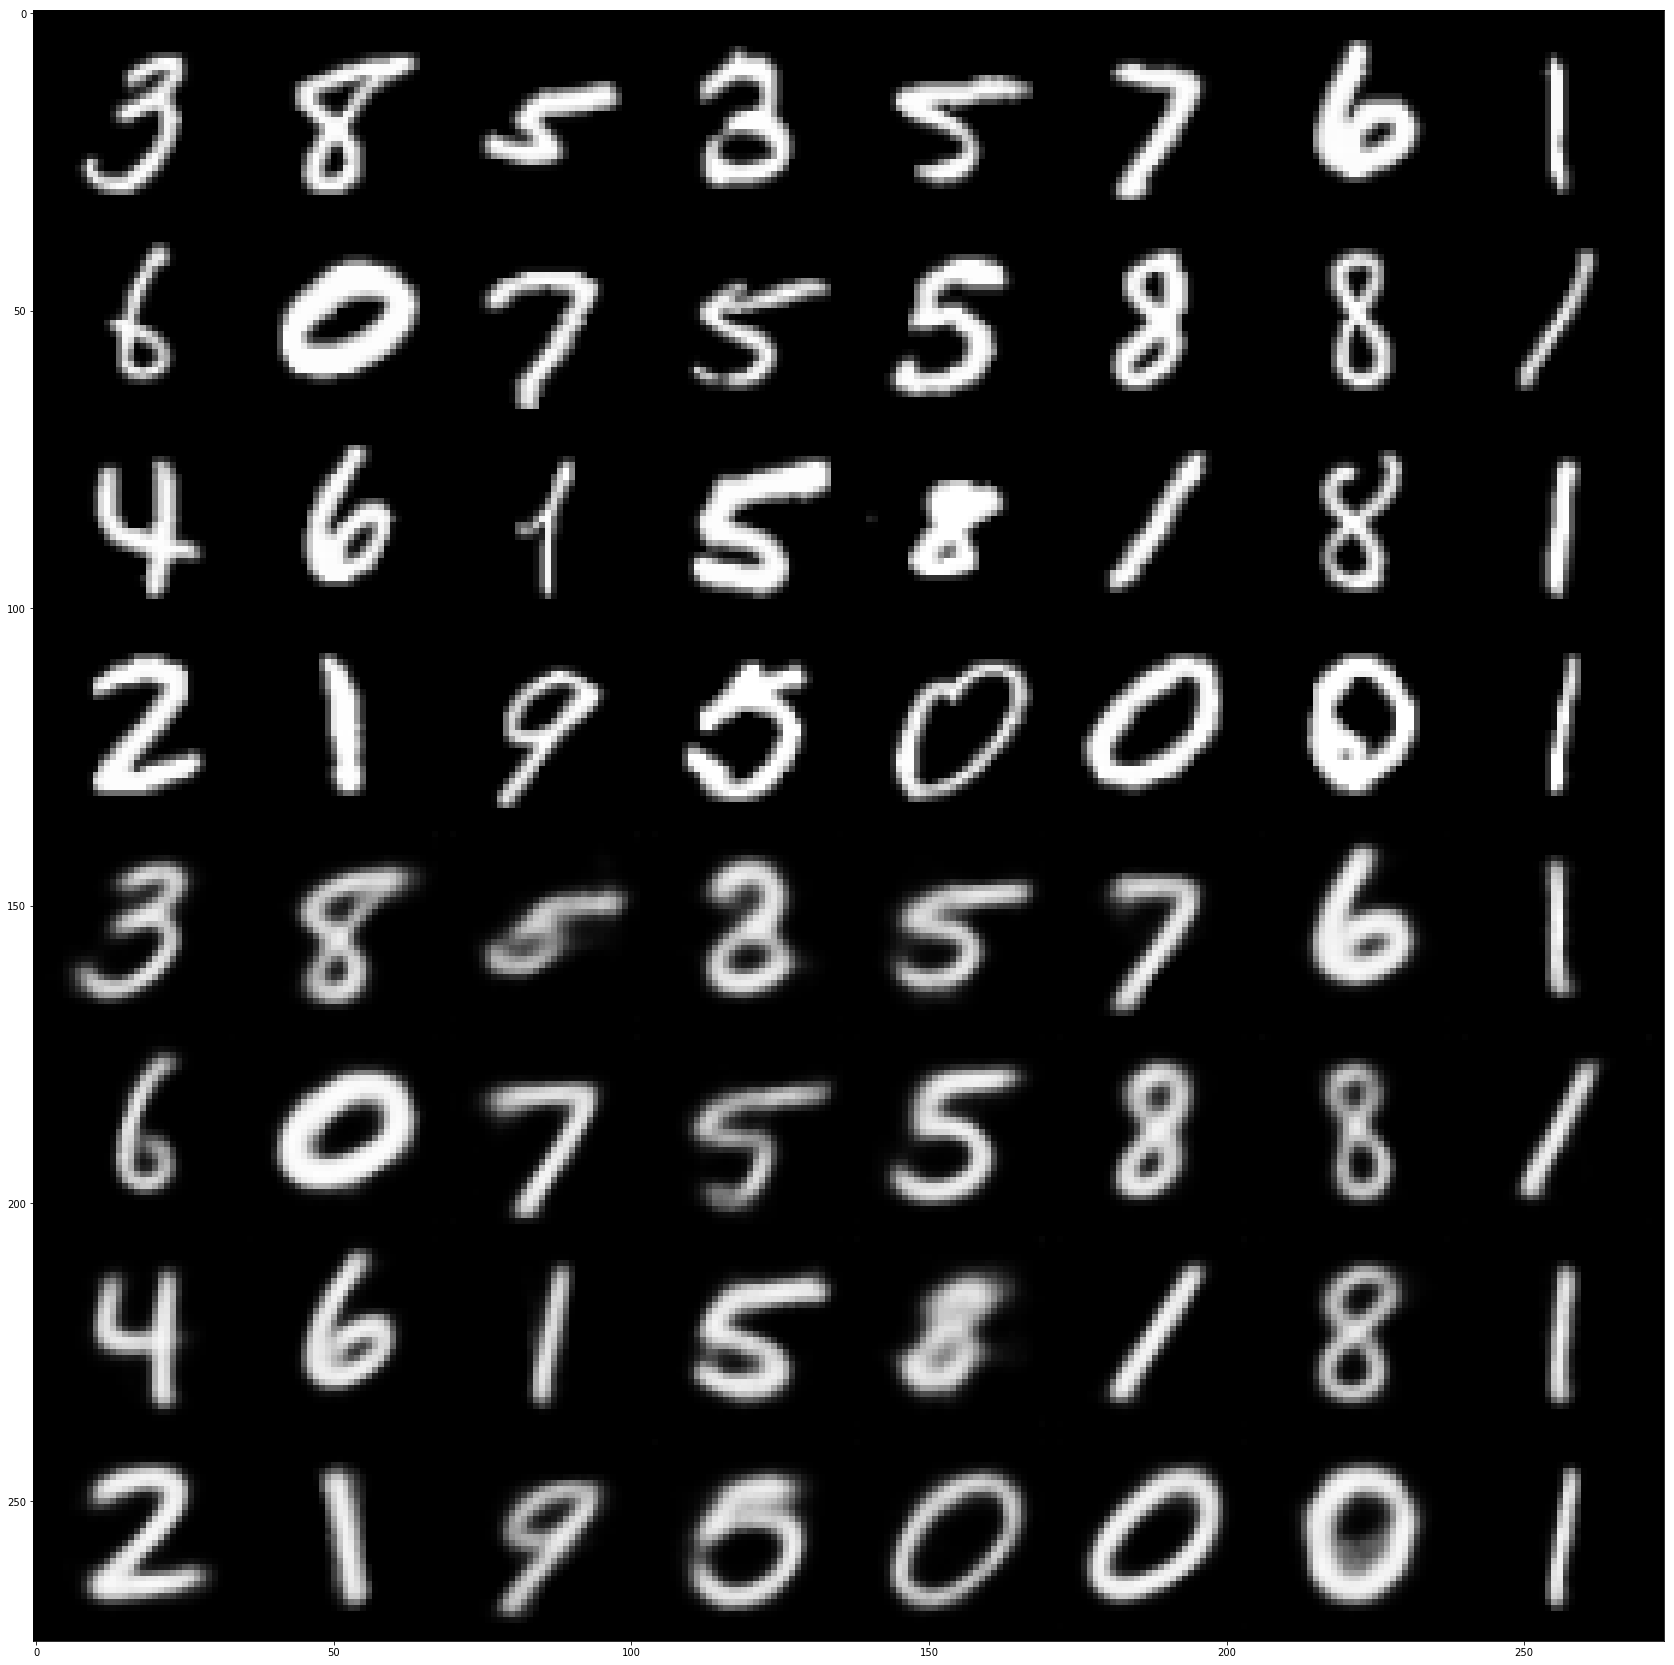

In [4]:
# Plot reconstructions
%matplotlib inline
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(10, 10)) 
# Get a batch of data
for batch, labels in test_loader:
    break
    
#get best model,easrly stopping

viz = Visualizer(model)

# Reconstruct data using Joint-VAE model
recon = viz.reconstructions(batch)

# face
# recon=np.rollaxis(recon.numpy(), 0, 3)  
# print(recon[265:,:,:].max())
# recon[:,:,:]=(recon[:,:,:]+1)/2
# plt.imshow(recon[:,:,:].astype(float))

#MNIST
plt.imshow(recon.numpy()[0, :, :].astype(float), cmap='gray')
#plt.savefig(path+"/recon.png")
print(recon.numpy()[0, :, :].max())



In [5]:
test_batch = iter(test_loader)
test_batch = next(test_batch)
latent_dist,mask,_ = model.encode(torch.tensor(test_batch[0]).cuda())

print(mask)

# for latent in latent_dist['cont'][0]:
#     count=torch.zeros((1,32))
#     latent[latent<1e-7]=0
    
#     for i in range(128):
    
#     #print(latent[i].size(),torch.nonzero(latent[i]))#len(torch.nonzero(latent[0]==0))
#         count[latent[i].reshape(1,32)!=0] += 1
#     print(count)
    

tensor([[1.0000, 1.0000, 1.0000, 1.0000, 0.5513, 1.0000, 0.3654, 1.0000, 0.0000,
         1.0000, 1.0000, 1.0000, 1.0000, 0.0000, 1.0000, 1.0000, 1.0000, 1.0000,
         1.0000, 1.0000, 1.0000, 1.0000, 0.0000, 0.0000, 1.0000, 0.0000, 0.0000,
         1.0000, 1.0000, 1.0000, 1.0000, 0.6456]], device='cuda:0',
       grad_fn=<ViewBackward>)


/data/anaconda/envs/mli/lib/python3.6/site-packages/ipykernel_launcher.py:3: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  This is separate from the ipykernel package so we can avoid doing imports until


/data/anaconda/envs/mli/lib/python3.6/site-packages/ipykernel_launcher.py:10: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  # Remove the CWD from sys.path while we load stuff.
/data/anaconda/envs/mli/lib/python3.6/site-packages/ipykernel_launcher.py:11: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  # This is added back by InteractiveShellApp.init_path()
/data/anaconda/envs/mli/lib/python3.6/site-packages/torch/nn/functional.py:1332: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")


torch.Size([64, 42]) 0
torch.Size([64, 42]) 1
torch.Size([64, 42]) 2
torch.Size([64, 42]) 3
torch.Size([64, 42]) 4
torch.Size([64, 42]) 5
torch.Size([64, 42]) 6
torch.Size([64, 42]) 7
torch.Size([64, 42]) 8
torch.Size([64, 42]) 9


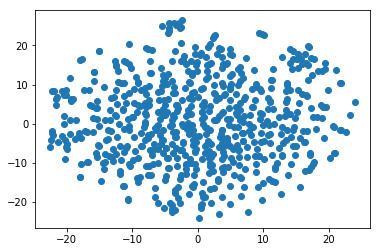

In [6]:
###latent space T-SNE visualization
from sklearn.manifold import TSNE
import numpy as np

samples = torch.zeros(1)
labels = torch.zeros(1)
for i in range(10):
    test_batch = iter(test_loader)
    test_batch = next(test_batch)
    new_labels =torch.tensor(test_batch[1])
    latent_dist,_ ,_= model.encode(torch.tensor(test_batch[0]).cuda())
    new_samples = model.reparameterize(latent_dist)
    print(new_samples.shape,i)
    if torch.sum(samples) == 0:
        samples =new_samples
        labels = new_labels
    else:
        samples = torch.cat((samples,new_samples),0)
        labels = torch.cat((labels, new_labels),0)
    #print(samples.shape)
    
##latent_varibales should be N,D--->N,2


# latent_variables = samples.reshape(samples[0],-1)
tsne = TSNE(n_components=2)

tsne.fit_transform(samples.detach().cpu().numpy())

plt.scatter(tsne.embedding_[:,0],tsne.embedding_[:,1])
#plt.imshow()

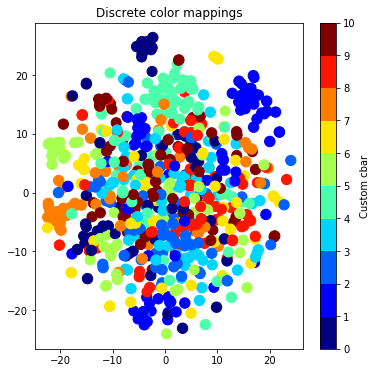

In [7]:
# import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt


N = 10 # Number of labels

# setup the plot
fig, ax = plt.subplots(1,1, figsize=(6,6))
# define the data
x = tsne.embedding_[:,0]
y = tsne.embedding_[:,1]
tag = labels# Tag each point with a corresponding label    

# define the colormap
cmap = plt.cm.jet
# extract all colors from the .jet map
cmaplist = [cmap(i) for i in range(cmap.N)]
# create the new map
cmap = cmap.from_list('Custom cmap', cmaplist, cmap.N)

# define the bins and normalize
bounds = np.linspace(0,N,N+1)
norm = mpl.colors.BoundaryNorm(bounds, cmap.N)

# make the scatter
scat = ax.scatter(x,y,c=tag,s=np.random.randint(100,110,N),cmap=cmap,     norm=norm)
# create the colorbar
cb = plt.colorbar(scat, spacing='proportional',ticks=bounds)
cb.set_label('Custom cbar')
ax.set_title('Discrete color mappings')
if not os.path.exists(path):
    os.makedirs(path)
plt.savefig(path+"/scatter.png")
plt.show()




t-SNE demo
import numpy as np
from sklearn.manifold import TSNE
X = np.arange(40).reshape(5,4,2)

X_new = X.reshape(5,-1)
#X = np.array([[[0,0], [0,0], [0,0]], [[0,0], [0,1], [1,1]], [[1,1], [1,0], [0,1]], [[1,1], [1,1], [1,1]]])
print(X.shape,X)
print("--------")
print(X_new)

tsne = TSNE(n_components=2)
tsne.fit_transform(X)
print(tsne.embedding_)

# Plot samples

samples = viz.samples()
plt.imshow(samples.numpy()[0, :174, :], cmap='gray')
print(np.sum(samples.numpy()[0, :174, :]))
print(samples.numpy()[0, :, :].shape)
####origin
4*28

0.5


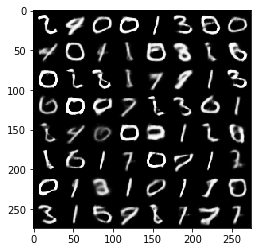

In [8]:
# Plot samples
import matplotlib as mpl

#MNIST
samples = viz.samples()
sample=samples.numpy()[0, :, :]/2+0.5
plt.imshow(sample, cmap='gray')
plt.imsave(path+"/samples",samples.numpy()[0, :, :]/2+0.5, cmap='gray')

print((sample).min())

# face
# fig = plt.figure(figsize=(50, 50)) 
# samples = viz.samples()
# samples = np.rollaxis(samples.numpy(), 0, 3)  
# print(samples[:,:,0].max())
# samples=(samples+1)/2
# plt.imshow(samples.astype(float),norm = norm)
# plt.imsave(path+"/samples",samples)
###DIP

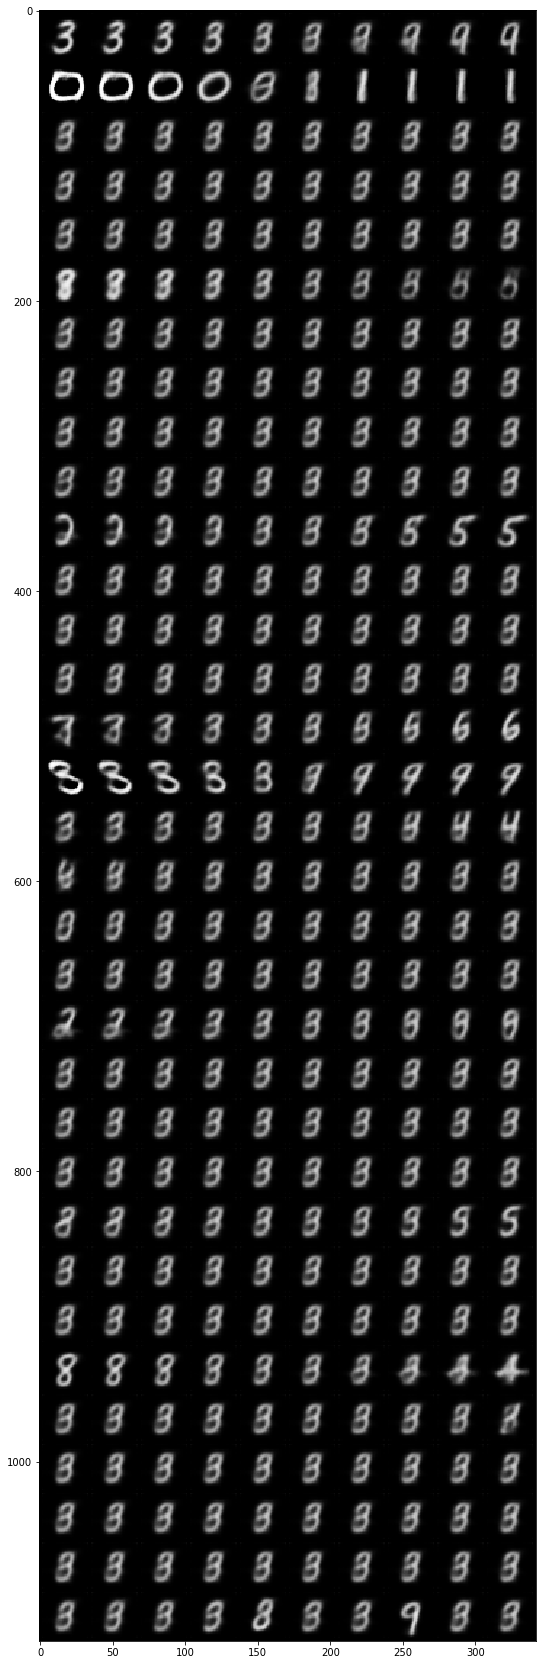

In [9]:
# Plot all traversals
fig = plt.figure(figsize=(30, 30))
traversals = viz.all_latent_traversals(size=10)

#MNIST
plt.imshow(traversals.numpy()[0, :, :], cmap='gray')
plt.imsave(path+"/all_traversals",traversals.numpy()[0, :, :], cmap='gray')

#face
# traversals = np.rollaxis(traversals.numpy(), 0, 3)  
# traversals=(traversals+1)/2
# plt.imshow(traversals)
# plt.imsave(path+"/all_traversals",traversals)
###dip[0., 0., 0., 0., 0., 1., 1., 1., 1., 0., 0., 1., 1., 1., 1., 0., 0., 1.,
#         0., 1., 1., 0., 1., 1., 0., 0., 1., 0., 1., 0., 1., 0.]

0.8851653

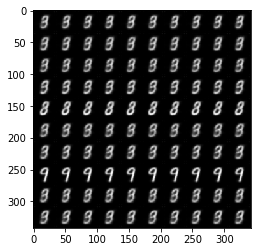

In [10]:
# Plot a grid of some traversals
traversals = viz.latent_traversal_grid(cont_idx=2, cont_axis=1, disc_idx=0, disc_axis=0, size=(10, 10))
#MNIST
plt.imshow(traversals.numpy()[0, :, :], cmap='gray')
plt.imsave(path+"/contVSdisc",traversals.numpy()[0, :, :], cmap='gray')

traversals.numpy()[0, :, :].max()
#face
# traversals = np.rollaxis(traversals.numpy(), 0, 3)
# traversals=(traversals+1)/2
# plt.imshow(traversals)
# plt.imsave(path+"/contVSdisc",traversals)
##origin

all_t = viz.all_latent_traversals()
print(all_t.shape)
plt.imshow(all_t.numpy()[0, :, :], cmap='gray')
plt.imsave("figures/beta/all_",traversals.numpy()[0, :, :], cmap='gray')

continuous


array([[ 1,  2,  3,  4,  6,  8, 10, 11, 12, 13, 15, 16, 17, 18, 19, 20,
        21, 22, 25, 28, 29, 30, 31]])

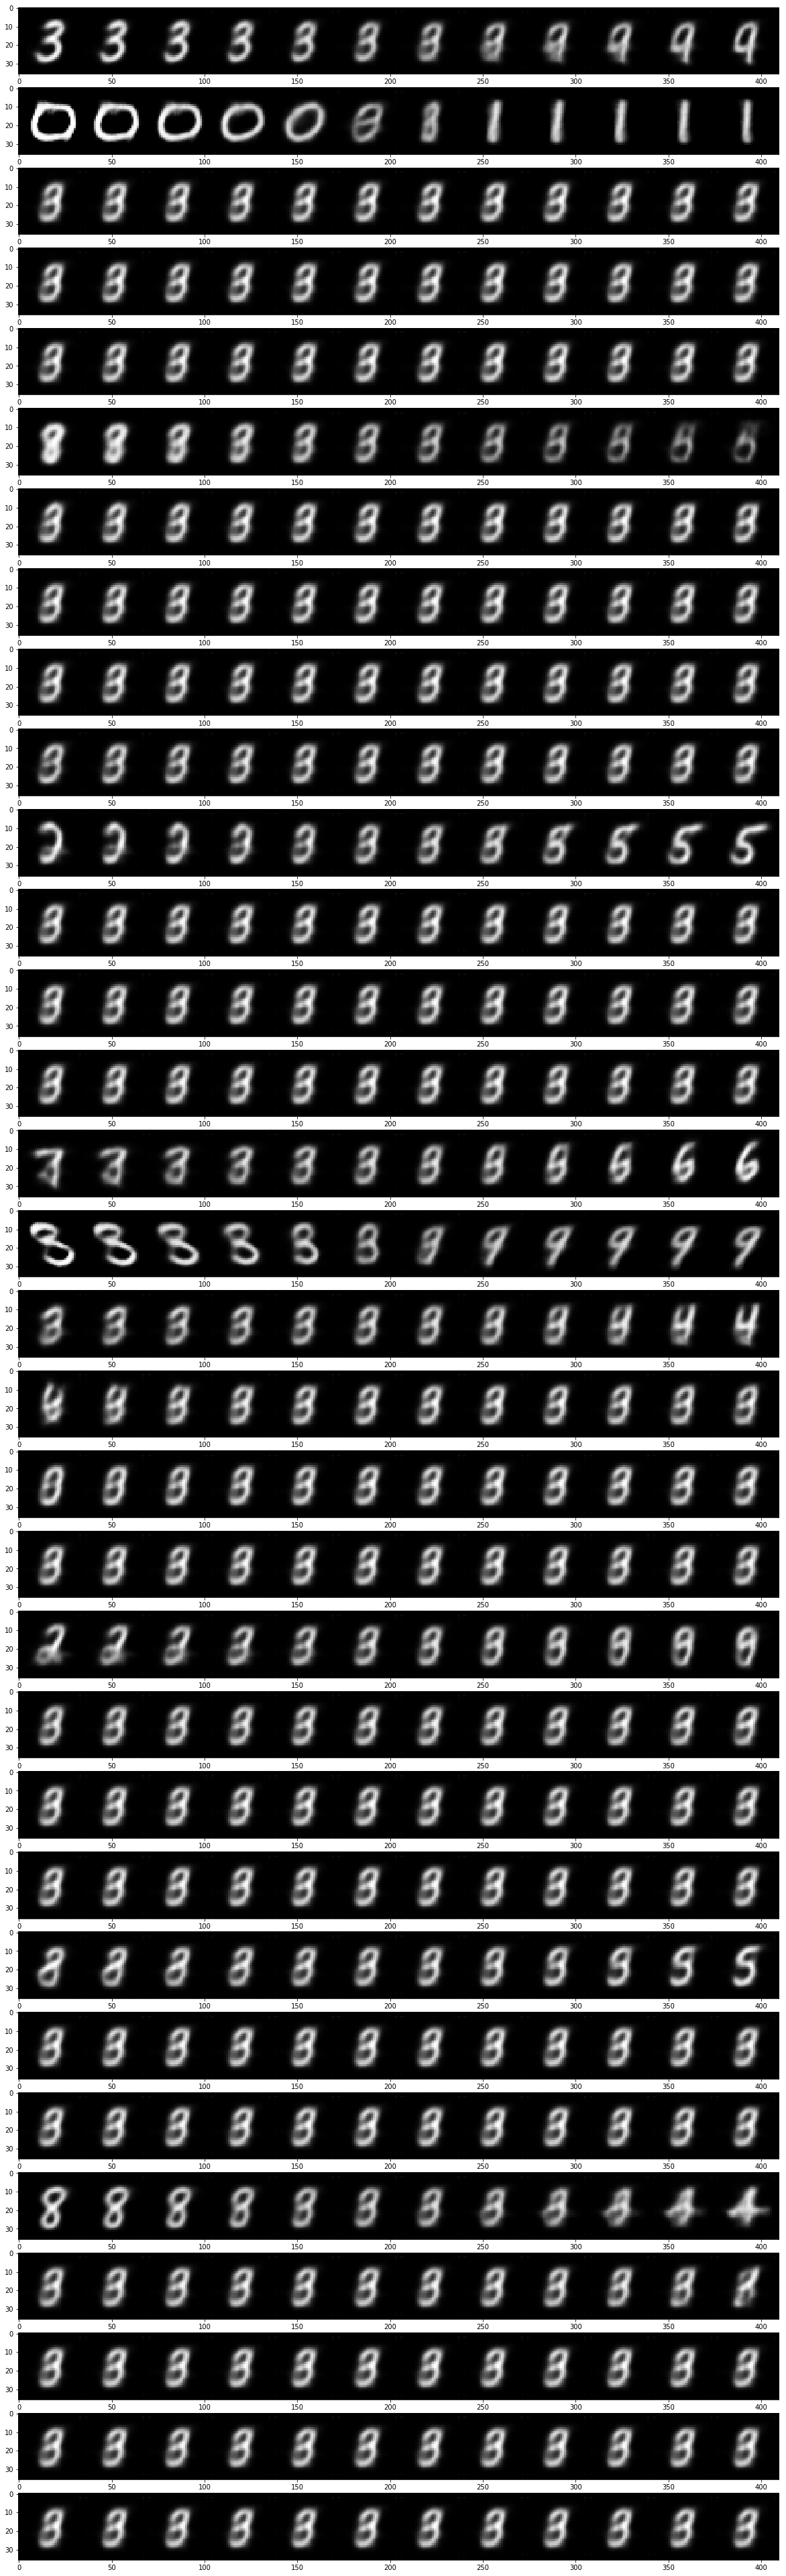

In [11]:
%matplotlib inline
import torch
import numpy as np
# Plot a grid of some traversals

fig = plt.figure(figsize=(70, 70))  # width, height in inches
print("continuous")
for i in range(n_cont):
    traversals = viz.latent_traversal_line(cont_idx=i, disc_idx=None,size=12)
    
    #MNIST
    sub = fig.add_subplot(n_cont, 1, i + 1)
    plt.savefig(path+"/cont{}.png".format(i))
    plt.imshow(traversals.numpy()[0, :, :], cmap='gray')
    
    #FACE
#     traversals = np.rollaxis(traversals.numpy(), 0, 3)
#     sub = fig.add_subplot(n_cont, 1, i + 1)
#     traversals=(traversals+1)/2
#     plt.imshow(traversals)   
plt.savefig(path+"/cont.png")
def show_idx(mask):
    a = mask.cpu().detach().numpy().squeeze()
    return np.array(np.where(a==1))+1
show_idx(mask)
    

discrete


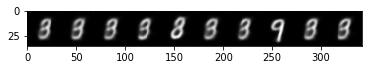

In [12]:
print("discrete")
for i in range(n_disc):
    traversals = viz.latent_traversal_line(cont_idx=None, disc_idx=i,size=10)
    ##MNIST
    sub = fig.add_subplot(n_disc, 1, i + 1)
    plt.savefig(path+"/disc{}.png".format(i))
    plt.imshow(traversals.numpy()[0, :, :], cmap='gray')

    #FACE
#     traversals = np.rollaxis(traversals.numpy(), 0, 3)
#     sub = fig.add_subplot(n_disc, 1, i + 1)
# traversals=(traversals+1)/2
# plt.savefig(path+"/disc{}.png".format(i))
# plt.imshow(traversals)

In [13]:
import numpy as np
import torch
from latent_traversals import LatentTraverser
from scipy import stats
from torch.autograd import Variable
from torchvision.utils import make_grid, save_image
import numpy as np
import torch
from latent_traversals import LatentTraverser
from scipy import stats
from torch.autograd import Variable
from torchvision.utils import make_grid, save_image

    
# face    
# def single_traversal(model,n_cont,cont_idx,cont_v,disc,disc_idx,prior):

#         # Generate latent traversal
# #         latent_samples = latent_traverser.traverse_line(cont_idx=cont_idx,
# #                                                              disc_idx=disc_idx,
# #                                                              size=size)
#         dim = n_cont + sum(disc)
#         if prior:
#             latent_samples = torch.tensor(np.random.normal(size=(1, dim)))
#         else:
#             latent_samples= torch.zeros((1,dim))
            
#         latent_samples[:,disc_idx+n_cont-1] = 1.0
#         latent_samples[:,cont_idx]=cont_v
        

#         # Map samples through decoder
#         generated = decode_latents(model, latent_samples.float()).squeeze()
#         generated  = np.rollaxis(generated.detach().numpy(), 0, 3)
#         generated = (generated +1)/2
#         print(generated.min(),generated.max())
#         plt.imshow(generated)

        
# def decode_latents(model, latent_samples):

#         latent_samples = Variable(latent_samples)
#         if model.use_cuda:
#             latent_samples = latent_samples.cuda()
#             result = model.decode(latent_samples).cpu()
#         return result

#MNIST
def single_traversal(model,n_cont,cont_idx,cont_v,disc,disc_idx,prior):

        # Generate latent traversal
#         latent_samples = latent_traverser.traverse_line(cont_idx=cont_idx,
#                                                              disc_idx=disc_idx,
#                                                              size=size)
        dim = n_cont + sum(disc)
        if prior:
            latent_samples = torch.tensor(np.random.normal(size=(1, dim)))
        else:
            latent_samples= torch.zeros((1,dim))
            
        latent_samples[:,disc_idx+n_cont-1] = 1.0
        latent_samples[:,cont_idx]=cont_v
        

        # Map samples through decoder
        generated = decode_latents(model, latent_samples.float()).squeeze()
        plt.imshow(generated.detach().numpy(),cmap="gray")

        
def decode_latents(model, latent_samples):

        latent_samples = Variable(latent_samples)
        if model.use_cuda:
            latent_samples = latent_samples.cuda()
        return model.decode(latent_samples).cpu()

In [14]:
from ipywidgets import interact, fixed
from IPython.display import display
def interactive_view(model,n_cont,disc):
    
    
    interact(single_traversal,model=fixed(model),
             n_cont=fixed(n_cont), cont_idx=(0,n_cont,1), cont_v=(-2.5,2.5,0.5),
             disc=fixed(disc),disc_idx=(0,9,1),
             prior=True);
             
interactive_view(model,n_cont,disc)
show_idx(mask)

interactive(children=(IntSlider(value=16, description='cont_idx', max=32), FloatSlider(value=0.0, description=…

array([[ 1,  2,  3,  4,  6,  8, 10, 11, 12, 13, 15, 16, 17, 18, 19, 20,
        21, 22, 25, 28, 29, 30, 31]])